# Consumer Demographic 

We have transaction data by customer_id, consumer demographics and their addresses. Let's merge them into a single dataframe for better analysis. After preprocessing them a bit, we perform exploratory data analysis.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')
sns.set_style('ticks')
from matplotlib import rcParams
rcParams['figure.figsize']= 10,5

pd.set_option('display.max_columns',60)

In [2]:
file_path = os.getcwd()+'/KPMG_VI_New_raw_data_update_final.xlsx'

In [3]:
sprocket_customer_demographic = pd.read_excel(file_path, sheet_name = 'CustomerDemographic',
                                       skiprows= 1, index_col ='customer_id')
sprocket_customer_address = pd.read_excel(file_path, sheet_name = 'CustomerAddress',
                                       skiprows= 1, index_col ='customer_id')



In [4]:
sprocket_new_customer = pd.read_excel(file_path, sheet_name = 'NewCustomerList',
                                       skiprows= 1)

In [5]:
sprocket_customer_demographic.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [6]:
sprocket_customer_address.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
sprocket_transactions_customer= pd.read_csv('Sprocket_Transactions_customer_id.csv', index_col='customer_id')
sprocket_transactions_customer

,online_order,list_price,order_status_Approved,order_status_Cancelled,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,offline_order,recency,top_customer
customer_id,,,,,,,,,,,,,,,,,
1,6.0,9084.45,11,0,4,2,2,2,1,0,1,3,7,0,5.0,849.582348,1.0
2,1.0,4149.07,3,0,1,0,0,0,0,2,0,0,3,0,2.0,970.582348,0.0
3,2.0,9888.23,8,0,2,3,0,0,3,0,1,3,4,0,6.0,944.582348,0.0
4,1.0,1047.72,2,0,1,0,0,1,0,0,0,0,2,0,1.0,1037.582348,0.0
5,2.0,5903.20,6,0,1,2,0,1,1,1,1,3,2,0,4.0,858.582348,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,2.0,3744.07,3,0,2,0,0,1,0,0,0,0,3,0,1.0,894.582348,0.0
3498,5.0,5177.06,6,0,0,0,1,2,1,2,0,0,5,1,1.0,969.582348,0.0
3499,4.0,7673.48,7,0,2,1,0,2,0,2,0,1,5,1,3.0,893.582348,0.0


In [8]:
sprocket_customer_id= pd.concat([sprocket_customer_demographic,sprocket_customer_address,sprocket_transactions_customer], axis=1)
sprocket_customerid= sprocket_customer_id.copy()

In [9]:
sprocket_customerid.shape

(4004, 34)

We have data of 4004 unique customer ids and 32 features. 

The last four rows seem to contain data only of customer addresses and nothing else. So,we drop them. Also the column 'default' doesn't seem to add much value. We drop it too. From DOB, we calculate age of a person and drop DOB. I don't think first name and last name matter either. 

In [10]:
sprocket_customerid=sprocket_customerid.iloc[:-4]
now= pd.Timestamp('now')
sprocket_customerid['age']= (now- sprocket_customerid['DOB']).astype('<m8[Y]')
sprocket_customerid.drop(['default', 'DOB','first_name','last_name'], axis=1, inplace=True)
sprocket_customerid.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,online_order,list_price,order_status_Approved,order_status_Cancelled,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,offline_order,recency,top_customer,age
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,F,93.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,6.0,9084.45,11.0,0.0,4.0,2.0,2.0,2.0,1.0,0.0,1.0,3.0,7.0,0.0,5.0,849.582348,1.0,66.0
2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,1.0,4149.07,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,970.582348,0.0,39.0
3,Male,61.0,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,2.0,9888.23,8.0,0.0,2.0,3.0,0.0,0.0,3.0,0.0,1.0,3.0,4.0,0.0,6.0,944.582348,0.0,66.0
4,Male,33.0,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,1.0,1047.72,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1037.582348,0.0,58.0
5,Female,56.0,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0,2.0,5903.20,6.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,0.0,4.0,858.582348,0.0,42.0


In [11]:
def missing_values_table(df):
    """
    input  : dataframe for which you want to calculate missing values - df
    output : table listing columns, missing value count and percentages
    """
    missing_val = df.isnull().sum() # missing values per column
    missing_val_percent = missing_val *100 / len(df)
    # creating a table
    missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
    missing_val_table_rename= missing_val_table.rename(columns=
                                                       {0:'Missing Values Count'
                                                        ,1:'Missing Values %'})
    missing_val_table_sort = missing_val_table_rename[missing_val_table_rename
                                                      ['Missing Values Count']
                                                        !=0].sort_values(by=
                                                        'Missing Values Count',
                                                        ascending = False).round(1)
    
    print('Your dataframe has {} columns of which {} columns contain missing values'.
          format(df.shape[1],len(missing_val_table_sort)))
    return missing_val_table_sort
    

In [12]:
missing_values_table(sprocket_customerid)

Your dataframe has 31 columns of which 26 columns contain missing values


,Missing Values Count,Missing Values %
job_industry_category,656,16.4
brand_Norco Bicycles,507,12.7
product_line_Mountain,507,12.7
brand_Trek Bicycles,507,12.7
brand_Solex,507,12.7
brand_OHM Cycles,507,12.7
brand_Giant Bicycles,507,12.7
order_status_Cancelled,507,12.7
order_status_Approved,507,12.7
list_price,507,12.7


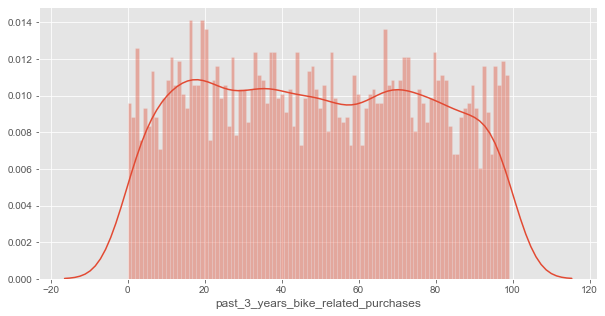

In [13]:
plt.style.use('ggplot')
sns.distplot(sprocket_customerid['past_3_years_bike_related_purchases'], bins=100)

We observe that the bike related purchases don't show a lot of variation. 

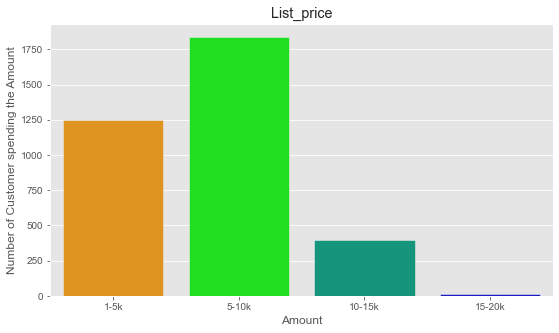

In [14]:
df= sprocket_customerid
var= 'list_price'
b_5 = df[var][(df[var] >= 0) & (df[var] <= 5000)]
b_10 = df[var][(df[var] >= 5001) & (df[var] <= 10000)]
b_15 = df[var][(df[var] >= 10001) & (df[var] <= 15000)]
b_20 = df[var][(df[var] >= 15001) & (df[var] <= 20000)]


bx = ["1-5k", "5-10k", "10-15k", "15-20k"]
by = [len(b_5.values), len(b_10.values), len(b_15.values), len(b_20.values)]

plt.figure(figsize=(9,5))
sns.barplot(x=bx, y=by, palette="nipy_spectral_r")
plt.title("List_price")
plt.xlabel("Amount")
plt.ylabel("Number of Customer spending the Amount")
plt.show()

We observe that majority of Sprocket Customer base lies in the spending range of $5000-10000 range, followed by $1000-5000 range. From the number of customers and mean spending range, customers spending 5-10k would be our focus group.

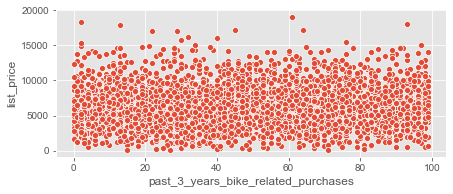

In [15]:
sns.pairplot(x_vars='past_3_years_bike_related_purchases', y_vars='list_price', data= sprocket_customerid, aspect=12/5)

Our goal is to understand what kind of customers spend more on bikes. From our data,we notice that past_3_years_bike_related_purchases isn't an indicator of customer inclination towards spending on bikes. Hence, we try to answer the following in relation to list_price. 

1. Does gender matter?
2. Customer's age?
3. The job title or industry the customer is employed in?
4. wealth segment? property valuation?
5. Whether they own a car or not?
6. Place they live in?

#### Gender

In [16]:
sprocket_customerid['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
M            1
Femal        1
Name: gender, dtype: int64

While there are no missing values in gender column, there is inconsistency in recording the values. We rename them and list three in total: Female, Male and U (which we understand to be Unknown) 

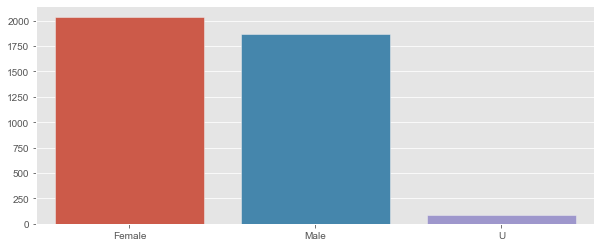

In [17]:
sprocket_customerid['gender']= sprocket_customerid['gender'].replace({'Femal':'Female','M':'Male','F':'Female'})
genders= sprocket_customerid['gender'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

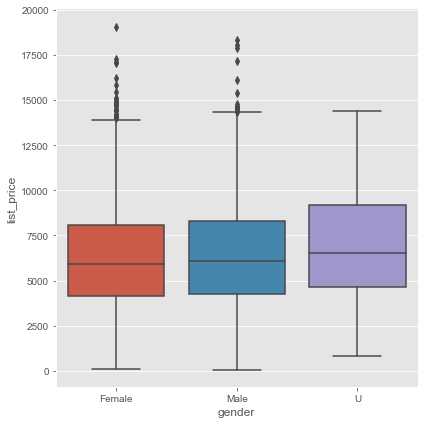

In [18]:
sns.catplot(x='gender', y= 'list_price', kind='box', data= sprocket_customerid, height=6)

On a whole customers of unkown gender have spent more on bikes, and males more than females.

In [19]:
sprocket_customerid[sprocket_customerid['list_price']>17500]

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,online_order,list_price,order_status_Approved,order_status_Cancelled,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,offline_order,recency,top_customer,age
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
941,Male,13.0,Recruiting Manager,Financial Services,Affluent Customer,N,Yes,1.0,5 Gale Street,4507.0,QLD,Australia,8.0,6.0,17898.46,10.0,0.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,1.0,8.0,1.0,4.0,875.582348,0.0,25.0
1129,Male,2.0,VP Marketing,Entertainment,Mass Customer,N,Yes,9.0,1 Nevada Park,4226.0,QLD,Australia,8.0,8.0,18349.27,13.0,0.0,4.0,3.0,0.0,2.0,1.0,3.0,0.0,4.0,9.0,0.0,5.0,868.582348,0.0,42.0
1597,Male,93.0,Nurse Practicioner,Retail,Affluent Customer,N,No,14.0,019 Derek Hill,2224.0,NSW,Australia,10.0,7.0,18052.68,12.0,0.0,2.0,1.0,0.0,1.0,4.0,4.0,0.0,1.0,10.0,1.0,5.0,867.582348,0.0,43.0
2183,Female,61.0,Programmer Analyst IV,Manufacturing,Mass Customer,N,Yes,7.0,8142 Tomscot Drive,4132.0,QLD,Australia,4.0,4.0,19071.32,14.0,0.0,6.0,1.0,3.0,3.0,1.0,0.0,0.0,2.0,11.0,1.0,10.0,850.582348,1.0,48.0


We notice some outliers, but they don't seem to be extreme values. So, we keep them.

#### Age

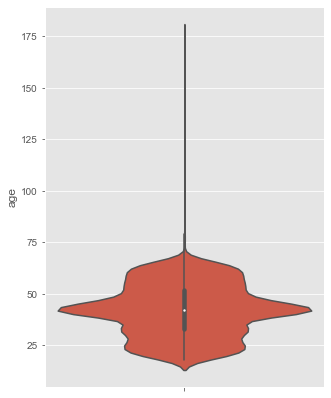

In [20]:
plt.figure(figsize=(5,7))
sns.violinplot(y=sprocket_customerid['age'])

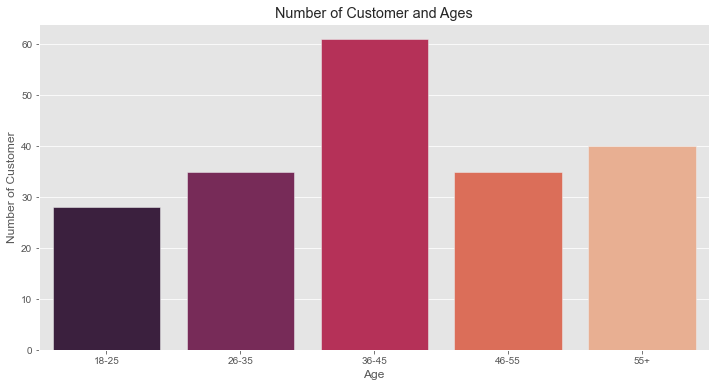

In [21]:
df= sprocket_customerid
age18_25 = df.age[(df.age <= 25) & (df.age >= 18) & (df['top_customer']==1)]
age26_35 = df.age[(df.age <= 35) & (df.age >= 26) & (df['top_customer']==1)]
age36_45 = df.age[(df.age <= 45) & (df.age >= 36) & (df['top_customer']==1)]
age46_55 = df.age[(df.age <= 55) & (df.age >= 46) & (df['top_customer']==1)]
age55above = df.age[(df.age >= 56) &(df['top_customer']==1)]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(12,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [22]:
sprocket_customerid['age'].isna().sum()

87

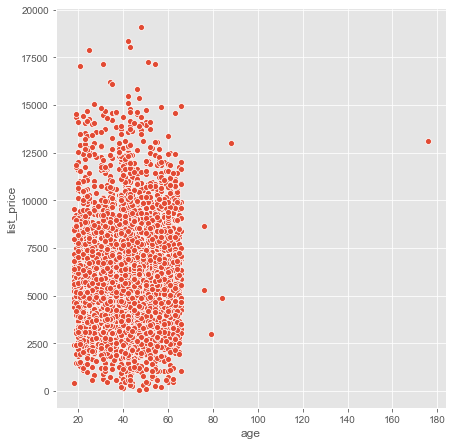

In [23]:
sns.pairplot(x_vars ='age', y_vars= 'list_price', data= sprocket_customerid, height=6)

We notice from our plot that one customer' age is close to 180 which is impossible. Otherwise, our customers' age group lies mostly between 36-45. We can't notice any particular trend either. Overall, age doesn't seem to have an effect on purchasing behavior. 

In [24]:
sprocket_customerid[sprocket_customerid['age']>170]

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,online_order,list_price,order_status_Approved,order_status_Cancelled,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,offline_order,recency,top_customer,age
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34,U,59.0,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005.0,QLD,Australia,8.0,3.0,13133.0,9.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,0.0,2.0,6.0,1.0,6.0,944.582348,0.0,176.0


There must be an error in recording the DOB. We will replace this and nan values with median of age

In [25]:
sprocket_customerid['age']= sprocket_customerid['age'].replace([176,np.nan],sprocket_customerid['age'].median() )

#### Job

In [26]:
sprocket_customerid['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

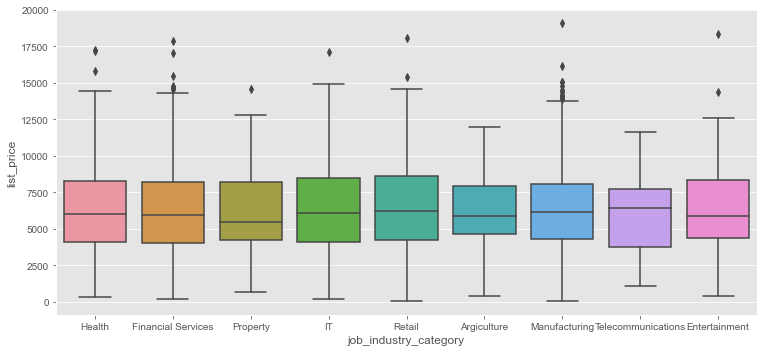

In [27]:
sns.catplot(x='job_industry_category', y= 'list_price', kind='box', data= sprocket_customerid, aspect=15/7)

From our box plot, we observe that customers whose job industry categroy is Property or Agriculture have made lower median bike related purchases over the past three years compared to the rest of job industry categories. 

In [28]:
sprocket_customerid['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

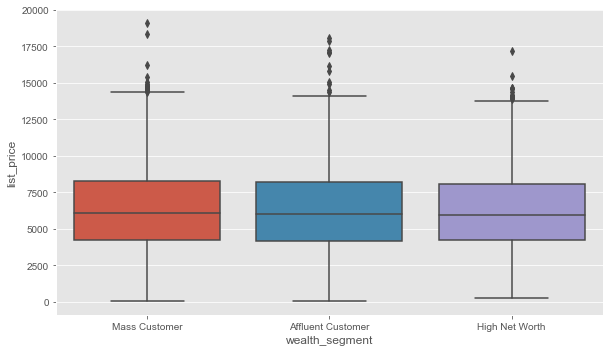

In [29]:
sns.catplot(x='wealth_segment', y= 'list_price', kind='box', data= sprocket_customerid, aspect=12/7)

It seems that Mass Customers made slightly more purchases than Affluent customers. High Net Worth Individuals despite their wealth didn't spend much more on bike related purchases.

In [30]:
sprocket_customerid['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

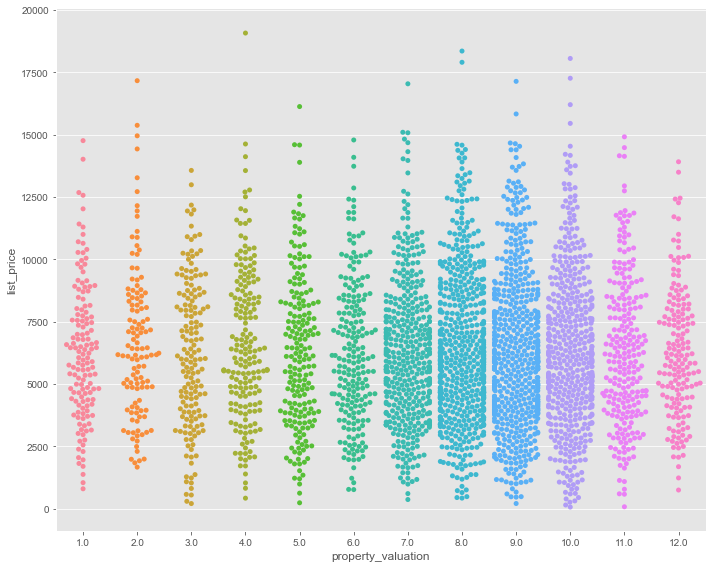

In [31]:
sns.catplot(x= 'property_valuation', y='list_price', kind='swarm', data= sprocket_customerid, height=8, aspect=15/12)

Properties values from 8-10 have more customers spending in the range $10,000-15,000 which is our target group.

In [32]:
sprocket_customerid['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [33]:
sprocket_customerid[sprocket_customerid['deceased_indicator']=='Y']

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,online_order,list_price,order_status_Approved,order_status_Cancelled,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,offline_order,recency,top_customer,age
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
753,Female,82.0,Food Chemist,Health,Affluent Customer,Y,Yes,6.0,37 Dorton Street,2594.0,NSW,Australia,3.0,4.0,11935.38,8.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,5.0,2.0,4.0,857.582348,1.0,50.0
3790,Male,91.0,Senior Editor,Retail,Mass Customer,Y,Yes,9.0,8681 Dennis Pass,3215.0,VIC,Australia,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0


We obviously want our customer to be alive to make purchases, however, in this case the column doesn't seem to be very relevant. Also, the two people who are deceased aren't outliers either. 

# heat map
Correlation

In [34]:
sprocket_customerid.corr()['list_price'].sort_values(ascending=False)

list_price                             1.000000
order_status_Approved                  0.863975
product_line_Standard                  0.739137
online_order                           0.616644
offline_order                          0.596825
top_customer                           0.400853
brand_Giant Bicycles                   0.394717
brand_Solex                            0.384884
brand_Trek Bicycles                    0.379715
brand_WeareA2B                         0.363263
product_line_Road                      0.338934
product_line_Touring                   0.290709
brand_OHM Cycles                       0.280618
brand_Norco Bicycles                   0.279975
order_status_Cancelled                 0.097291
product_line_Mountain                  0.068226
postcode                               0.010399
past_3_years_bike_related_purchases    0.005198
age                                    0.002454
tenure                                -0.005221
property_valuation                    -0

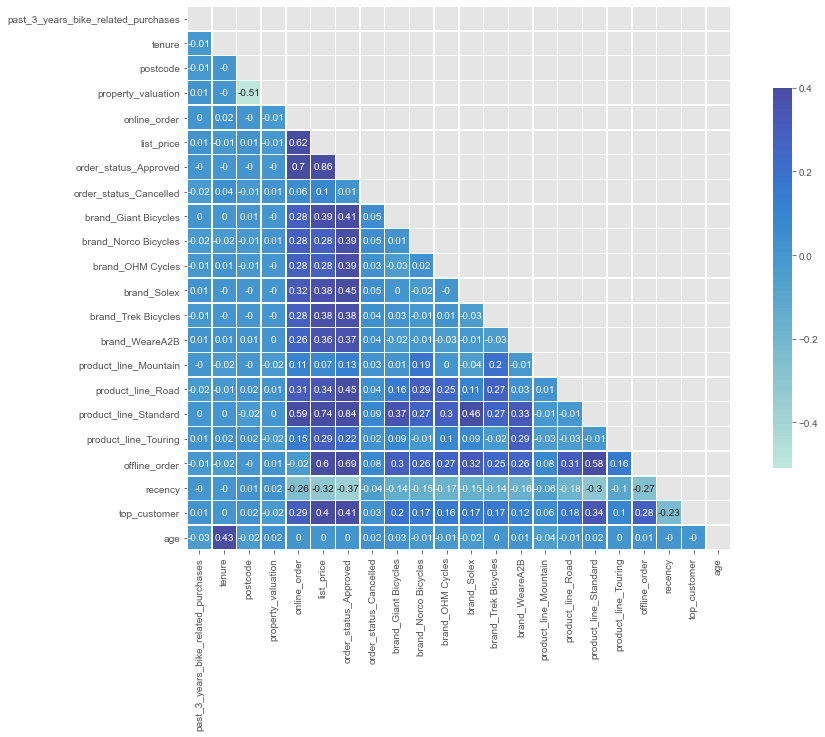

In [35]:
#heat map for categorical features after label encoding
corr= sprocket_customerid.corr().round(2)
# create a mask for upper triangle
mask= np.triu(np.ones_like(corr, dtype= np.bool))
# set up the matplotlib figure
fig, ax= plt.subplots( figsize= (15,10))

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask= mask, vmax=0.4,
           center= True, annot= True, square= True, linewidth= 0.5, 
           cbar_kws={'shrink':0.7})

# Location


In [36]:
sprocket_customerid

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,online_order,list_price,order_status_Approved,order_status_Cancelled,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,offline_order,recency,top_customer,age
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Female,93.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,6.0,9084.45,11.0,0.0,4.0,2.0,2.0,2.0,1.0,0.0,1.0,3.0,7.0,0.0,5.0,849.582348,1.0,66.0
2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,1.0,4149.07,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,970.582348,0.0,39.0
3,Male,61.0,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,2.0,9888.23,8.0,0.0,2.0,3.0,0.0,0.0,3.0,0.0,1.0,3.0,4.0,0.0,6.0,944.582348,0.0,66.0
4,Male,33.0,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,1.0,1047.72,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1037.582348,0.0,58.0
5,Female,56.0,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0,2.0,5903.20,6.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,0.0,4.0,858.582348,0.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,Female,8.0,VP Product Management,Health,Mass Customer,N,No,19.0,0 Transport Center,3977.0,VIC,Australia,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0
3997,Female,87.0,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,4 Dovetail Crossing,2350.0,NSW,Australia,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
3998,U,60.0,Assistant Manager,IT,High Net Worth,N,No,NaN,736 Roxbury Junction,2540.0,NSW,Australia,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0


In [37]:
sprocket_customerid['state'].value_counts()

NSW                2052
VIC                 939
QLD                 837
New South Wales      86
Victoria             82
Name: state, dtype: int64

We add latitudes and longitudes to the data with respect to the postcodes to be able to plot the addresses geographically
https://www.matthewproctor.com/australian_postcodes

In [38]:
australian_postcodes = pd.read_csv(os.getcwd()+'/australian_postcodes.csv')
australian_postcodes = australian_postcodes[['postcode','long','lat']]
australian_postcodes = australian_postcodes.drop_duplicates(subset='postcode', keep='last')
australian_postcodes = australian_postcodes.set_index('postcode')
australian_postcodes.head()

,long,lat
postcode,,
200,149.118900,-35.277700
800,130.836680,-12.458684
801,130.836680,-12.458684
804,130.873315,-12.428017
810,130.866242,-12.381806


In [39]:
customer_postcode= pd.DataFrame(sprocket_customerid['postcode'].unique(), columns=['Unique_postcodes'])
customer_postcode.dropna(inplace=True)
customer_postcode= customer_postcode.set_index('Unique_postcodes')
customer_long_lat = customer_postcode.join(australian_postcodes)
customer_long_lat.head()

,long,lat
Unique_postcodes,,
2016.0,151.206211,-33.894912
2153.0,150.955942,-33.731651
4211.0,153.241258,-28.035453
2448.0,152.956681,-30.604667
3216.0,144.334005,-38.215906


In [40]:
sprocket_customerid['postcode'].mode()

0    2170.0
dtype: float64

In [41]:
sprocket_customerid['postcode']=sprocket_customerid['postcode'].fillna(2170)

In [42]:
sprocket_customer_df= (sprocket_customerid.reset_index()).set_index('postcode').join(customer_long_lat).reset_index()
sprocket_customer_df= sprocket_customer_df.rename(columns={'index':'postcode'}).set_index('customer_id')
sprocket_customer_df.head()

,postcode,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,state,country,property_valuation,online_order,list_price,order_status_Approved,order_status_Cancelled,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,offline_order,recency,top_customer,age,long,lat
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
819,2000.0,Male,7.0,Associate Professor,Manufacturing,Affluent Customer,N,Yes,5.0,84 Loomis Pass,NSW,Australia,12.0,3.0,5033.21,5.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0,2.0,885.582348,0.0,44.0,151.256649,-33.859953
1815,2000.0,Female,23.0,Software Test Engineer I,Argiculture,Mass Customer,N,Yes,19.0,1508 Hooker Avenue,NSW,Australia,8.0,5.0,4235.58,5.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,0.0,0.0,853.582348,0.0,66.0,151.256649,-33.859953
2560,2000.0,Male,7.0,Developer IV,NaN,Mass Customer,N,No,21.0,583 Eagle Crest Road,NSW,Australia,8.0,5.0,9706.62,11.0,0.0,2.0,3.0,2.0,2.0,1.0,1.0,0.0,3.0,8.0,0.0,6.0,887.582348,0.0,39.0,151.256649,-33.859953
2629,2000.0,Female,60.0,Engineer IV,Entertainment,High Net Worth,N,No,19.0,2 Beilfuss Plaza,NSW,Australia,9.0,3.0,7374.25,5.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,3.0,2.0,3.0,886.582348,0.0,43.0,151.256649,-33.859953
2636,2000.0,Female,35.0,Nuclear Power Engineer,Manufacturing,High Net Worth,N,Yes,14.0,701 Talisman Crossing,NSW,Australia,10.0,2.0,3411.77,3.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,872.582348,0.0,46.0,151.256649,-33.859953


In [43]:
import geopandas as gpd
import descartes 
map_path = '/Users/kavyaannapareddy/Desktop/kpmg/Igismap/Australia_Polygon.shp'
aus_map = gpd.read_file(map_path)


In [44]:
# create points describing the longitude and latitiude
from shapely.geometry import Point, Polygon
geometry = [Point(xy) for xy in zip(sprocket_customer_df['long'], sprocket_customer_df['lat'])]
geometry[:3]

In [45]:
len(geometry)

4000

In [46]:
crs= {'init':'epsg:4326'}
geo_df= gpd.GeoDataFrame(sprocket_customer_df, crs= crs, geometry= geometry)
geo_df.head()

/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,postcode,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,state,country,property_valuation,online_order,list_price,order_status_Approved,order_status_Cancelled,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,offline_order,recency,top_customer,age,long,lat,geometry
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
819,2000.0,Male,7.0,Associate Professor,Manufacturing,Affluent Customer,N,Yes,5.0,84 Loomis Pass,NSW,Australia,12.0,3.0,5033.21,5.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0,2.0,885.582348,0.0,44.0,151.256649,-33.859953,POINT (151.25665 -33.85995)
1815,2000.0,Female,23.0,Software Test Engineer I,Argiculture,Mass Customer,N,Yes,19.0,1508 Hooker Avenue,NSW,Australia,8.0,5.0,4235.58,5.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,0.0,0.0,853.582348,0.0,66.0,151.256649,-33.859953,POINT (151.25665 -33.85995)
2560,2000.0,Male,7.0,Developer IV,NaN,Mass Customer,N,No,21.0,583 Eagle Crest Road,NSW,Australia,8.0,5.0,9706.62,11.0,0.0,2.0,3.0,2.0,2.0,1.0,1.0,0.0,3.0,8.0,0.0,6.0,887.582348,0.0,39.0,151.256649,-33.859953,POINT (151.25665 -33.85995)
2629,2000.0,Female,60.0,Engineer IV,Entertainment,High Net Worth,N,No,19.0,2 Beilfuss Plaza,NSW,Australia,9.0,3.0,7374.25,5.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,3.0,2.0,3.0,886.582348,0.0,43.0,151.256649,-33.859953,POINT (151.25665 -33.85995)
2636,2000.0,Female,35.0,Nuclear Power Engineer,Manufacturing,High Net Worth,N,Yes,14.0,701 Talisman Crossing,NSW,Australia,10.0,2.0,3411.77,3.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,872.582348,0.0,46.0,151.256649,-33.859953,POINT (151.25665 -33.85995)


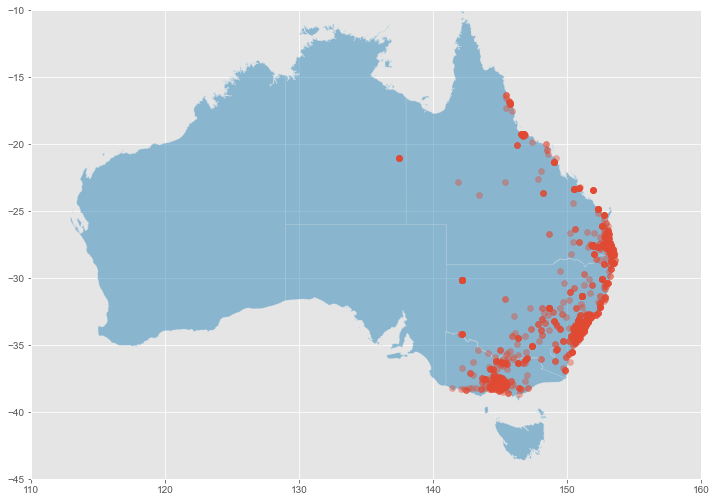

In [86]:
fig,ax= plt.subplots(figsize= (12,12))
plt.axis([110,160,-45,-10])
aus_map.plot(ax=ax, alpha= 0.3)
geo_df.plot(ax=ax, alpha= 0.4)


We see that our customer base is primarily along the coast line and organized into three main clusters. 

(-40.0, -15.0)

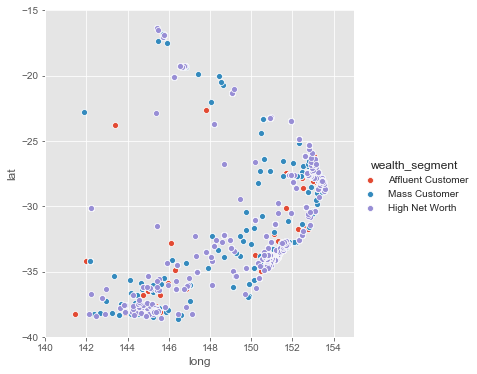

In [48]:
sns.pairplot( x_vars='long', y_vars='lat', hue='wealth_segment', data=geo_df, height=5)
plt.xlim(140,155)
plt.ylim(-40,-15)

(-40.0, -15.0)

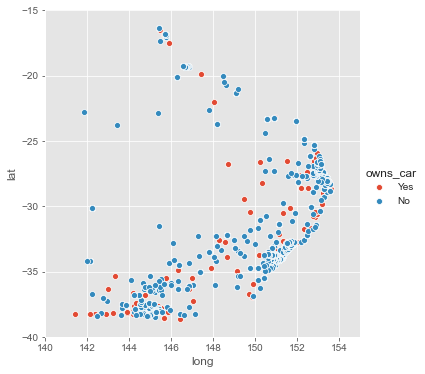

In [49]:
sns.pairplot( x_vars='long', y_vars='lat', hue='owns_car', data=geo_df, height=5)
plt.xlim(140,155)
plt.ylim(-40,-15)

(-40.0, -15.0)

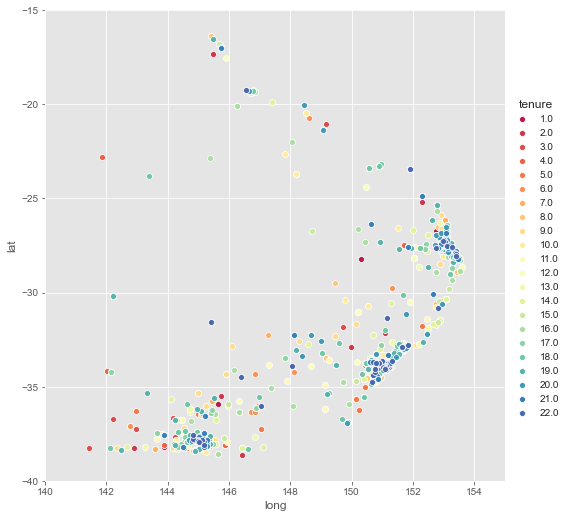

In [50]:
sns.pairplot( x_vars='long', y_vars='lat', hue='tenure', 
             data=geo_df, height=7, palette= 'Spectral')
plt.xlim(140,155)
plt.ylim(-40,-15)

(-40.0, -15.0)

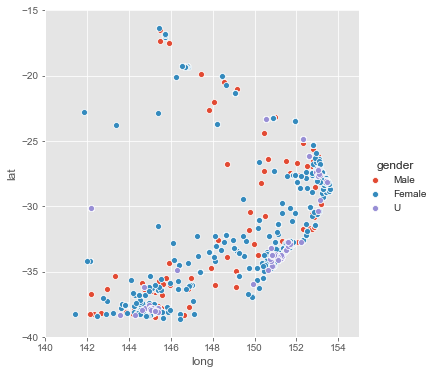

In [51]:
sns.pairplot( x_vars='long', y_vars='lat', hue='gender', data=geo_df, height=5)
plt.xlim(140,155)
plt.ylim(-40,-15)


We can see from the above scatterplots that the features such as gender, tenure, wealth-segment and tenure allow us cluster the customers into groups with varying diameters. Some are closely knit than others. However, does that translate to bike related spending?

We use top_customer as our differentiating parameter.

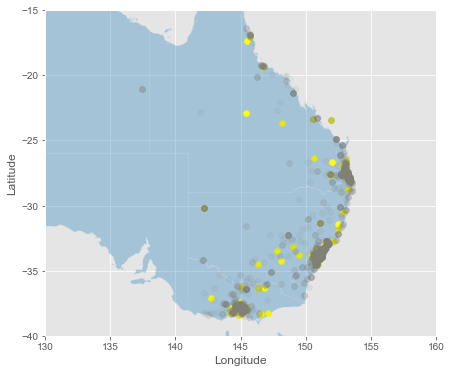

In [52]:
fig,ax= plt.subplots(figsize= (7,9))
plt.axis([130,160,-40,-15])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
aus_map.plot(ax=ax, alpha= 0.2)
geo_df[geo_df['top_customer']==1].plot(ax=ax, color='yellow', alpha=1)
geo_df[geo_df['top_customer']==0].plot(ax=ax, color='grey', alpha=0.1)

We observe three main clusters. However, our target group and the others customer groups are not seperate geographically. 

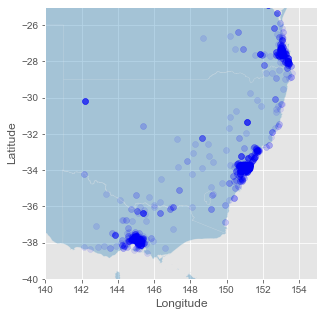

In [53]:
fig,ax= plt.subplots(figsize= (7,5))
plt.axis([140,155,-40,-25])
aus_map.plot(ax=ax, alpha= 0.2)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#geo_df[geo_df['list_price']>15000].plot(ax=ax, color='yellow', alpha=1)
#geo_df[(geo_df['list_price']>10000)&(geo_df['list_price']<15000)].plot(ax=ax, color='red', alpha=0.3)
geo_df[(geo_df['list_price']>5000)&(geo_df['list_price']<10000)].plot(ax=ax, color='blue', alpha=0.1)
#geo_df[geo_df['list_price']<5000].plot(ax=ax, color='grey', alpha=0.1)

The cluster lying at longitiudes 150-152 and latitudes -36 to -32 seems to be the thickest cluster and can be our target group.

# Conclusion
We observe that the data is very much dependent on geography of the region and forms mainly into three main clusters. In our next notebook, we build our model for customer segmentation and targeting. Let's create X_train, X_test and Y_train files.
Before that let's save our current data into a csv file. 

In [54]:
sprocket_customerid.to_csv('Sprocket_Customer_Data.csv')

In [55]:
features=['gender', 'past_3_years_bike_related_purchases',
          'job_title','job_industry_category','wealth_segment',
          'deceased_indicator','owns_car','tenure','postcode',
          'property_valuation','age']
features_cat=['gender','job_title','job_industry_category',
             'wealth_segment','deceased_indicator','owns_car']
labels=['top_customer']

In [56]:
missing_values_table(sprocket_customerid[features+labels])

Your dataframe has 12 columns of which 5 columns contain missing values


,Missing Values Count,Missing Values %
job_industry_category,656,16.4
top_customer,507,12.7
job_title,506,12.6
tenure,87,2.2
property_valuation,4,0.1


In [57]:
sprocket_customerid_copy= sprocket_customerid.copy()

In [58]:
sprocket_customerid_copy.dropna(how='any', inplace = True)

I have two options:

1. Impute values
2. Drop rows with missing values

I will first get feature importances to see which of these variables are crucial for the algorithm and make my decision accordingly.

In [62]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
sprocket_customerid_copy= sprocket_customerid_copy.apply(le.fit_transform)
sprocket_customerid_copy

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,online_order,list_price,order_status_Approved,order_status_Cancelled,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,offline_order,recency,top_customer,age
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,93,71,3,2,0,1,10,194,7,1,0,9,6,2072,11,0,4,2,2,2,1,0,1,3,7,0,5,7,1,48
2,1,81,19,2,2,0,1,15,1513,109,1,0,9,1,606,3,0,1,0,0,0,0,2,0,0,3,0,2,128,0,21
9,0,97,38,0,0,0,1,7,2481,14,1,0,11,1,1017,6,0,1,0,1,3,0,1,0,1,5,0,5,78,0,29
12,1,58,106,5,2,0,0,7,1155,719,2,0,3,3,1387,7,0,1,4,0,1,0,1,0,1,6,0,4,67,0,7
13,1,38,58,2,1,0,1,7,558,559,3,0,5,4,1763,7,0,0,2,0,2,1,2,0,1,4,2,3,27,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,1,30,135,3,1,0,0,17,798,63,0,0,9,5,2221,6,0,1,1,2,1,0,1,0,2,3,1,1,93,0,38
3494,1,72,5,0,1,0,0,0,921,22,0,0,9,2,940,4,0,1,1,0,0,2,0,0,2,2,0,2,4,0,3
3495,0,57,127,2,1,0,0,7,275,324,0,0,8,3,1993,7,0,1,1,2,2,1,0,0,3,4,0,4,13,0,14


In [66]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf= RandomForestClassifier(random_state=42)
rnd_clf.fit(sprocket_customerid_copy[features], sprocket_customerid_copy[labels])
for name, importance in zip(sprocket_customerid_copy[features].keys(), rnd_clf.feature_importances_):
    print(name, "=", importance)
    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


gender = 0.025519077159202964
past_3_years_bike_related_purchases = 0.15268295873268467
job_title = 0.1723614156007079
job_industry_category = 0.07370784812806587
wealth_segment = 0.040433092867239645
deceased_indicator = 0.005059547309292529
owns_car = 0.02475400184977534
tenure = 0.10608283094087849
postcode = 0.1834388500408162
property_valuation = 0.08375389088091888
age = 0.13220648649041755


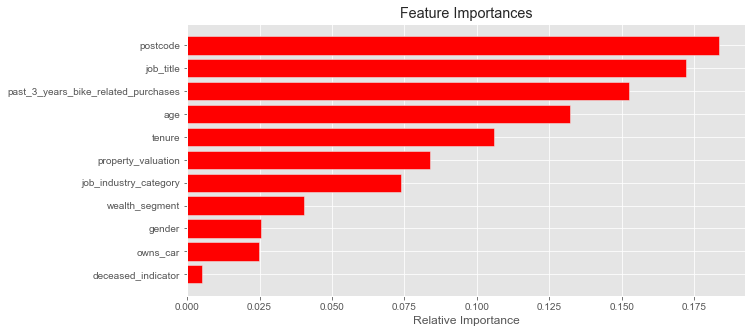

In [67]:
# Plotting feature importance
features = sprocket_customerid_copy[features].keys()
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
"""  
from sklearn.impute import KNNImputer
imp_knn= KNNImputer()
sprocket_customerid[['tenure','property_valuation','list_price']]= imp_knn.fit_transform(sprocket_customerid[['tenure','property_valuation','list_price']])
from sklearn.impute import SimpleImputer
imp_cat= SimpleImputer(missing_values= np.nan, strategy ='most_frequent')
sprocket_customerid[['job_industry_category','job_title']]= imp_cat.fit_transform(sprocket_customerid[['job_industry_category','job_title']])
"""

In [68]:
X_train= sprocket_customerid_copy[features]
y_train= sprocket_customerid_copy[labels]

In [69]:
X_train.shape

(2525, 11)

In [70]:
y_train.shape

(2525, 1)

In [71]:
sprocket_new_customer['age']= (now- sprocket_new_customer['DOB']).astype('<m8[Y]')

In [72]:
missing_values_table(sprocket_new_customer[features])

Your dataframe has 11 columns of which 3 columns contain missing values


,Missing Values Count,Missing Values %
job_industry_category,165,16.5
job_title,106,10.6
age,17,1.7


In [73]:
sprocket_new_customer['age'].mode()

0    45.0
dtype: float64

In [74]:
from sklearn.impute import SimpleImputer
sprocket_new_customer['age']= sprocket_new_customer['age'].fillna(45)
imp_cat= SimpleImputer(missing_values= np.nan, strategy ='most_frequent')
sprocket_new_customer[['job_industry_category','job_title']]= imp_cat.fit_transform(sprocket_new_customer[['job_industry_category','job_title']])

In [83]:
y_test_id = sprocket_new_customer[['first_name','last_name']]

In [78]:
X_test= sprocket_new_customer[features]
X_test = X_test.apply(le.fit_transform)

In [79]:
X_test.shape

(1000, 11)

In [84]:
X_train.to_csv('X_train.csv',index=False )
y_train.to_csv('y_train.csv', index= False)
X_test.to_csv('X_test.csv', index=False)
y_test_id.to_csv('y_test_id.csv', index=False)

# Conclusion